In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import common ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Import other potentially useful libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np


In [22]:
# prompt: make a good binary classification dataset using make classification use only 2 features

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,       # Can reduce samples if desired for clarity
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=50,       # << INCREASE THIS SIGNIFICANTLY
    flip_y=0,          # << REDUCE OR ELIMINATE NOISE
    hypercube=False,
    random_state=1
)

import pandas as pd
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y
print(df.head())


   feature1  feature2  target
0  0.405789 -0.710058       0
1 -0.116488 -0.476388       0
2 -0.540390  1.297900       1
3 -1.814392  0.705854       0
4 -2.555027  3.237674       1


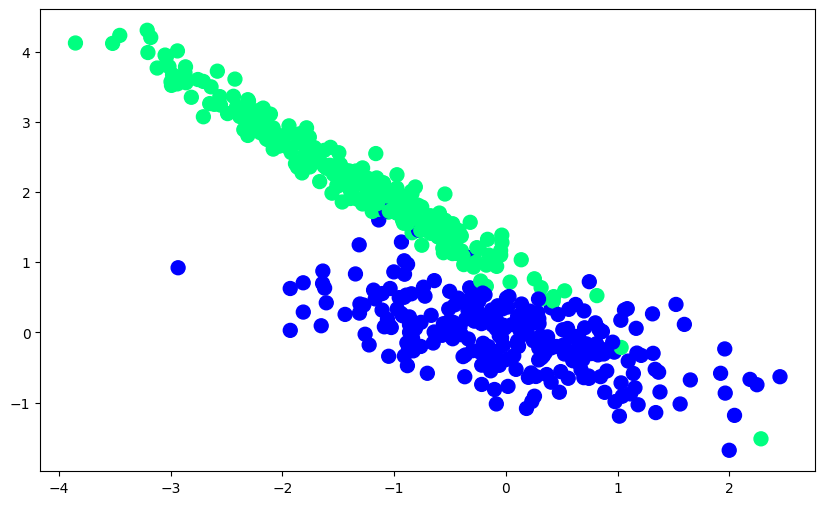

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [24]:
def step(z):
    return 1 if z>0 else 0

In [26]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [27]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[0.15966171 0.76856994]
-0.6999999999999998


In [28]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,5,100)
y_input = m*x_input + b

(-3.0, 2.0)

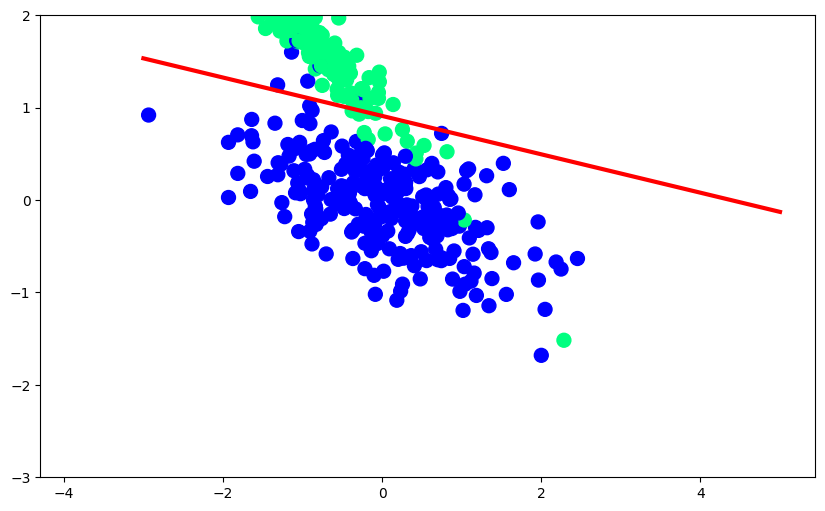

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Now with Sigmoid Function

In [30]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [39]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(100000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [40]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[ 2.38602676 10.9128708 ]
-10.044604024182076


In [41]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,5,100)
y_input = m*x_input + b

(-3.0, 2.0)

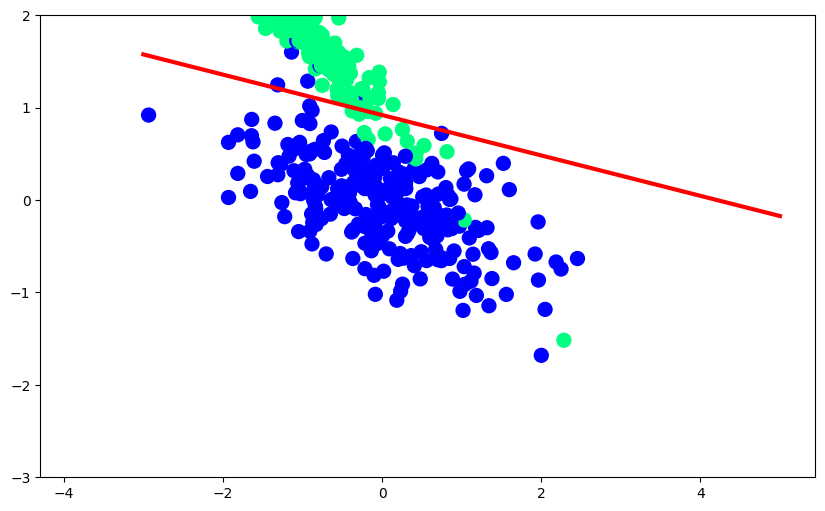

In [42]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)